In [1]:
# I want to fact-check the February 2021 visualization from the Heritage foundation, 
# on their website with almost no commentary,
# https://datavisualizations.heritage.org/public-health/one-percent-of-us-counties-account-for-bulk-of-covid-19-deaths/
# "Through January 31, there have been 433,401 deaths in the U.S. from COVID-19, but a significant 
#  proportion of those have occurred in just a handful of counties. In fact, the 30 counties with 
#  the most deaths represent 1 percent of all counties, 21 percent of the total U.S. population, 
#  and 28 percent of all U.S. deaths."



In [3]:
# The CDC has an API to serve county-level cases and deaths data:
# https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-County-and-Race-and/k8wy-p9cg

# Initial tests suggest, though, that the data does not reach back to January 2021.


In [4]:
# There is a huge, updated database on the NY Times github page:
# https://github.com/nytimes/covid-19-data 
# That contains a 75-Mb file us-counties.csv.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
counties = pd.read_csv("us-counties.csv")

In [6]:
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [7]:
# Let us grab just the slice of deaths representing Cook Co:
cookco = counties.loc[np.where( counties.fips == 17031)]

In [8]:
len(cookco)

648

In [ ]:
# 600 data points.. less than two years.. check.
plt.plot(cookco.date, cookco.deaths)

In [ ]:
# That took a long time and seems like it was plotting nominal time data.   
# Search engine, "pandas to date format," please?
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# Thanks.

In [9]:
d = pd.to_datetime(counties["date"])


In [10]:
d


0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
1875093   2021-11-01
1875094   2021-11-01
1875095   2021-11-01
1875096   2021-11-01
1875097   2021-11-01
Name: date, Length: 1875098, dtype: datetime64[ns]

In [11]:
counties["date"] = d

In [12]:
cookco = counties.loc[np.where( counties.fips == 17031)]

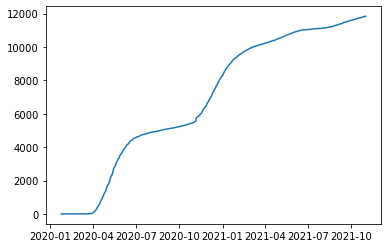

In [13]:
plt.plot(cookco.date, cookco.deaths)

In [ ]:
# Now everyone stare at this for a minute.  What is this the graph of ?

In [ ]:
#  A:  This is the cumulative sum of a bimodal distribution;
# There were two waves of high death rate separated by 
# periods of quiet. 

In [ ]:
# Let us plot per-day deaths:

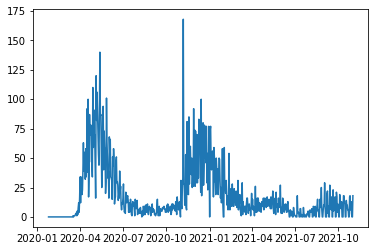

In [14]:
plt.plot(cookco.date[1:], np.diff(cookco.deaths))

In [ ]:
# It's a little noisy.  Differences between points 7 
# days apart will automatically average over 7-day intervals:

In [15]:
smooth = cookco["deaths"] - cookco["deaths"].shift(7)

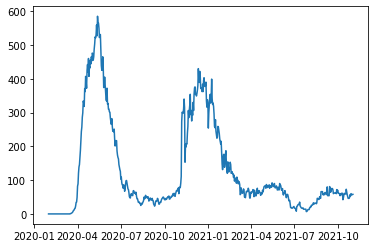

In [16]:
plt.plot(cookco.date, smooth)

In [ ]:
# Note a few things.
# 1. The scale changed, we're plotting weekly deaths now.
# 2. There are 7 data points per week, and each data point represents
# the preceding 7 days reporting--so the area under the graph is 7x 
# the true death rate.  This isn't exactly deceptive, but I don't want
# to fool myself either.

In [ ]:
# There is an initial wave of deaths in spring 2020, and a 
# second wave of roughly equal intensity November-March 2021.

In [17]:
cookco.deaths

3              0.0
6              0.0
11             0.0
16             0.0
21             0.0
            ...   
1859470    11823.0
1862719    11826.0
1865968    11826.0
1869217    11826.0
1872466    11844.0
Name: deaths, Length: 648, dtype: float64

In [18]:
len(counties)

1875098

In [21]:
# And there were 650 days, so about this many countes
len(counties)/650

2884.766153846154

In [22]:
febdata = counties.loc[np.where(counties.date =="2021-01-31")]

In [23]:
len(febdata)

3247

In [ ]:
# If I encounter a TypeError at this stage, it is becuase I can't compare an ISO8601 
# date string to an np.datetime64-typed object.

In [24]:
febdata = counties.loc[np.where(counties.date ==np.datetime64("2021-01-31"))]

In [25]:
len(febdata)

3247

In [26]:
febdata.head()

,date,county,state,fips,cases,deaths
982097,2021-01-31,Autauga,Alabama,1001.0,5669,69.0
982098,2021-01-31,Baldwin,Alabama,1003.0,18126,224.0
982099,2021-01-31,Barbour,Alabama,1005.0,1951,40.0
982100,2021-01-31,Bibb,Alabama,1007.0,2307,52.0
982101,2021-01-31,Blount,Alabama,1009.0,5713,100.0


In [ ]:
febdata.deaths.sum()

In [ ]:
# This is more than 433,401 deaths quoted on the Heratige site, but 
# we are clearly in the right ballpark here; the 8000 deaths might be 
# differences in the territorial scope of their query or the data may
# have been revised upward by 1.7%.  Onward!

(array([2.879e+03, 1.410e+02, 6.300e+01, 1.700e+01, 1.900e+01, 1.000e+01,
        1.100e+01, 9.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

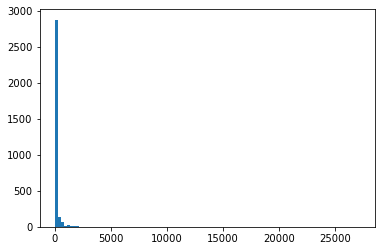

In [27]:
plt.hist(febdata.deaths, bins=100)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 4.433577838129562] is not finite

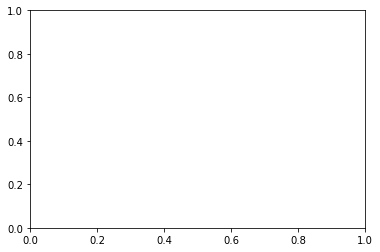

In [28]:
# Ack.  That's not very expressive, is it?
# In vanilla matplotlib, you have to draw your own bins if you want a nice log-histogram.

# https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib
    
plt.hist(np.log(febdata.deaths) / np.log(10), bins=100)


(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  57.,   0.,
          0.,   0.,  59.,   0.,   0.,  62.,   0.,  68.,  50.,   0.,  51.,
         53., 103.,  62.,  98.,  85.,  74., 130., 105., 121., 127., 155.,
        167., 130., 126., 122., 134., 137.,  79.,  90.,  72.,  68.,  58.,
         59.,  48.,  43.,  40.,  43.,  22.,  22.,  18.,  27.,  24.,  12.,
         11.,  10.,  11.,   9.,  10.,  10.,   3.,   6.,   4.,   0.,   2.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([-2.        , -1.93566422, -1.87132844, -1.80699266, -1.74265688,
        -1.6783211 , -1.61398532, -1.54964954, -1.48531376, -1.42097798,
        -1.3566422 , -1.29230642, -1.22797064, -1.16363486, -1.09929908,
        -1.0349633 , -0.97062752, -0.90629174, -0.84195596, -0.77762018,
        -0.7132844 , -0.64

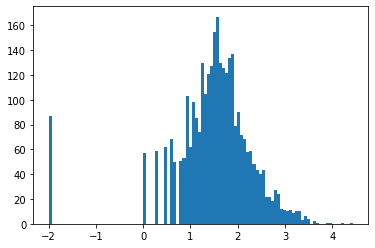

In [29]:
# This is a "can't take logarithm of zero" error.
# I can fix (for now) by adding one one-hundredth
# and remembering that counties with .01 deaths 
# reported zero or NaN deaths in the database.
plt.hist(np.log(febdata.deaths + .01) / np.log(10), bins=100)


In [31]:
# So I have to make my own logarithmicly spaced histogram bins.
bins = np.exp(np.arange(-1,4,.05))

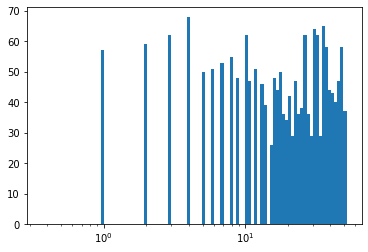

In [32]:
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")

In [ ]:
# What happened to my monomodal distribution?
# Domain is wrong.. only 10^(-0.5) to 10^2

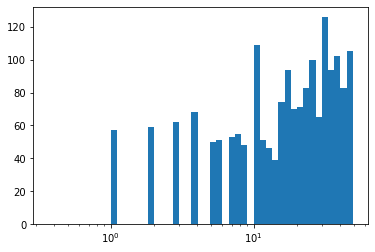

In [33]:
# Try coarser bins?
bins = np.exp(np.arange(-1,4,.1))
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")

In [34]:
# That's still not right.  Am I using arange wrong?

In [35]:
bins

array([ 0.36787944,  0.40656966,  0.44932896,  0.4965853 ,  0.54881164,
        0.60653066,  0.67032005,  0.74081822,  0.81873075,  0.90483742,
        1.        ,  1.10517092,  1.22140276,  1.34985881,  1.4918247 ,
        1.64872127,  1.8221188 ,  2.01375271,  2.22554093,  2.45960311,
        2.71828183,  3.00416602,  3.32011692,  3.66929667,  4.05519997,
        4.48168907,  4.95303242,  5.47394739,  6.04964746,  6.68589444,
        7.3890561 ,  8.16616991,  9.0250135 ,  9.97418245, 11.02317638,
       12.18249396, 13.46373804, 14.87973172, 16.44464677, 18.17414537,
       20.08553692, 22.19795128, 24.5325302 , 27.11263892, 29.96410005,
       33.11545196, 36.59823444, 40.44730436, 44.70118449, 49.40244911])

In [36]:
# That's not the right range.  I wanted 10^(-1) to 10^4.
# I wanted to use logs base 10, but forgot that the 
# inverse of log base 10 is not np.exp, it's np.power(10,x)

Text(0.5, 0, 'per-county deaths')

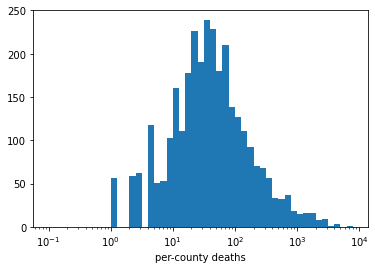

In [37]:
bins = np.power(10, np.arange(-1,4,.1) )
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")
plt.xlabel("per-county deaths")

In [ ]:
# And it looks like now we're silently ignoring 
# the counties with no deaths becuase they're offscale:

Text(0.5, 0, 'per-county deaths')

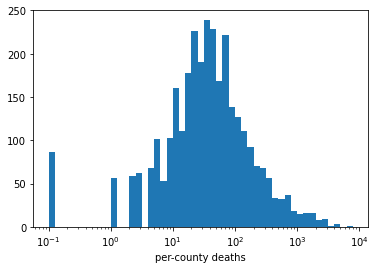

In [38]:
bins = np.power(10, np.arange(-1,4,.1) )
plt.hist(febdata.deaths+.1 , bins=bins )
plt.xscale("log")
plt.xlabel("per-county deaths")

In [39]:
# This log-histogram really robs me of any sense of what the 
# distribution is actually like.
# Can we plot deaths by county's death rank?
deathsbycounty = febdata.sort_values("deaths")

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

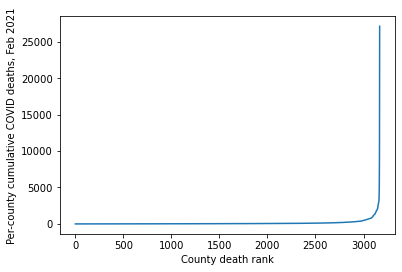

In [40]:
plt.plot(np.arange(len(deathsbycounty)), deathsbycounty.deaths)
plt.xlabel("County death rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

In [ ]:
# Rrr.  This still does not make me think I understand.  
# This is not a very expressive graph--one county has 27000 
# deaths, there are 3100 counties; I can tell little else,
# least of all the total body count.


In [ ]:
# Wait a sec, one county with 27,000 deaths, does that make sense?
# The largest county on Heratige's page was LA County with only 17,000.

In [41]:
counties.sort_values("deaths")

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
291986,2020-07-01,Curry,New Mexico,35009.0,165,0.0
1423254,2021-06-15,Daggett,Utah,49009.0,56,0.0
291979,2020-07-01,Unknown,New Jersey,NaN,643,0.0
1423266,2021-06-15,Rich,Utah,49033.0,159,0.0
...,...,...,...,...,...,...
1874255,2021-11-01,Vega Baja,Puerto Rico,72145.0,4451,NaN
1874256,2021-11-01,Vieques,Puerto Rico,72147.0,272,NaN
1874257,2021-11-01,Villalba,Puerto Rico,72149.0,1018,NaN
1874258,2021-11-01,Yabucoa,Puerto Rico,72151.0,1633,NaN


In [42]:
# These NaN values for deaths are getting in my way, I'm going to reset them
# to zero now.
counties[np.isnan(counties.deaths)] =0

In [53]:
# And I better update the data frames representing convenient subsets too
febdata = counties.loc[np.where(counties.date ==np.datetime64("2021-01-31"))]
cookco = counties.loc[np.where( counties.fips == 17031)]
deathsbycounty = febdata.sort_values("deaths")

In [54]:
counties.sort_values("deaths")

,date,county,state,fips,cases,deaths
0,2020-01-21 00:00:00,Snohomish,Washington,53061.0,1,0.0
258730,2020-06-20 00:00:00,Upshur,West Virginia,54097.0,11,0.0
258729,2020-06-20 00:00:00,Tyler,West Virginia,54095.0,3,0.0
258728,2020-06-20 00:00:00,Tucker,West Virginia,54093.0,5,0.0
258727,2020-06-20 00:00:00,Taylor,West Virginia,54091.0,13,0.0
...,...,...,...,...,...,...
1857480,2021-10-27 00:00:00,New York City,New York,NaN,1117924,34544.0
1863978,2021-10-29 00:00:00,New York City,New York,NaN,1119470,34557.0
1870476,2021-10-31 00:00:00,New York City,New York,NaN,1119470,34557.0
1867227,2021-10-30 00:00:00,New York City,New York,NaN,1119470,34557.0


In [ ]:
# NYC has its own codepoint.

In [44]:
"Queens" in counties.county.values

False

In [45]:
"Kings" in counties.county.values

True

In [46]:
counties.loc[np.where(counties.county == "Kings")]

,date,county,state,fips,cases,deaths
14154,2020-03-27 00:00:00,Kings,California,6031.0,1,0.0
15936,2020-03-28 00:00:00,Kings,California,6031.0,1,0.0
17825,2020-03-29 00:00:00,Kings,California,6031.0,2,0.0
19802,2020-03-30 00:00:00,Kings,California,6031.0,3,0.0
21876,2020-03-31 00:00:00,Kings,California,6031.0,4,0.0
...,...,...,...,...,...,...
1859055,2021-10-28 00:00:00,Kings,California,6031.0,33485,336.0
1862304,2021-10-29 00:00:00,Kings,California,6031.0,33626,337.0
1865553,2021-10-30 00:00:00,Kings,California,6031.0,33626,337.0
1868802,2021-10-31 00:00:00,Kings,California,6031.0,33626,337.0


In [47]:
counties.loc[np.where(counties.county == "Kings")]["state"].value_counts()

California    585
Name: state, dtype: int64

In [ ]:
# Now I am convinced that we are not double-counting NYC.
# Our data source does not give us borough-level detail tho.

In [ ]:
# The legend says "cumulative"
# meaning cumulative by time.  Let's try cumulative by county. 

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

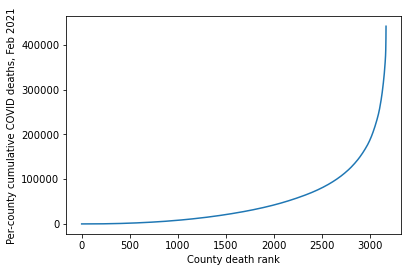

In [48]:
plt.plot(np.arange(len(deathsbycounty)), np.cumsum(deathsbycounty.deaths))
plt.xlabel("County death rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

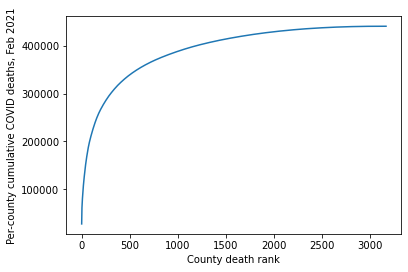

In [49]:
plt.plot(np.arange(len(deathsbycounty)), np.cumsum(deathsbycounty.deaths.sort_values(ascending=False)))
plt.xlabel("County death rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

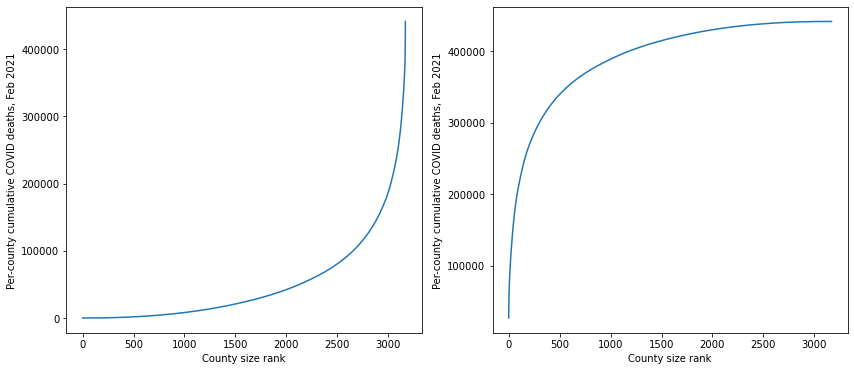

In [50]:
# Let us plot these side-by-side
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(np.arange(len(deathsbycounty)), np.cumsum(deathsbycounty.deaths.sort_values(ascending=True)))
plt.xlabel("County size rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")
plt.subplot(122)
plt.plot(np.arange(len(deathsbycounty)), np.cumsum(deathsbycounty.deaths.sort_values(ascending=False)))
plt.xlabel("County size rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

In [ ]:
# This is getting closer.  Clearly more than half of deaths are in a 
# small fracton of the counties; on linear scales, these graphs
# are the same, but counting from largest to smallest vs. smallest
# to largest matters if you want to transform either axis by,
# for instance, logarithmic scaling.

In [55]:
# top 30 counties, fraction of deaths?
deathsbycounty.head()

,date,county,state,fips,cases,deaths
982482,2021-01-31 00:00:00,Unknown,Florida,NaN,3334,0.0
982328,2021-01-31 00:00:00,Sierra,California,6091.0,43,0.0
983196,2021-01-31 00:00:00,Powell,Kentucky,21197.0,884,0.0
984318,2021-01-31 00:00:00,Unknown,Oklahoma,NaN,134,0.0
984351,2021-01-31 00:00:00,Sherman,Oregon,41055.0,49,0.0


In [56]:
deathsbycounty[-30:]

,date,county,state,fips,cases,deaths
983402,2021-01-31 00:00:00,Oakland,Michigan,26125.0,70447,1898.0
983999,2021-01-31 00:00:00,Westchester,New York,36119.0,94213,1906.0
983899,2021-01-31 00:00:00,Middlesex,New Jersey,34023.0,63956,1923.0
982405,2021-01-31 00:00:00,Fairfield,Connecticut,9001.0,72026,1932.0
983329,2021-01-31 00:00:00,Essex,Massachusetts,25009.0,77363,1969.0
982424,2021-01-31 00:00:00,Broward,Florida,12011.0,172864,2092.0
982406,2021-01-31 00:00:00,Hartford,Connecticut,9003.0,63211,2107.0
984789,2021-01-31 00:00:00,El Paso,Texas,48141.0,113637,2116.0
984939,2021-01-31 00:00:00,Tarrant,Texas,48439.0,216910,2160.0
982468,2021-01-31 00:00:00,Palm Beach,Florida,12099.0,107240,2166.0


In [57]:
np.sum(deathsbycounty.deaths[-30:]) / np.sum(deathsbycounty.deaths)

0.2952374693801708

In [58]:
np.sum(deathsbycounty.deaths[-30:])

130288.0

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [60]:
counties.sort_values("deaths")[-10:]

,date,county,state,fips,cases,deaths
1844482,2021-10-23 00:00:00,New York City,New York,NaN,1113762,34502.0
1841232,2021-10-22 00:00:00,New York City,New York,NaN,1113762,34502.0
1850982,2021-10-25 00:00:00,New York City,New York,NaN,1116428,34531.0
1854231,2021-10-26 00:00:00,New York City,New York,NaN,1117283,34533.0
1860729,2021-10-28 00:00:00,New York City,New York,NaN,1117924,34544.0
1857480,2021-10-27 00:00:00,New York City,New York,NaN,1117924,34544.0
1863978,2021-10-29 00:00:00,New York City,New York,NaN,1119470,34557.0
1870476,2021-10-31 00:00:00,New York City,New York,NaN,1119470,34557.0
1867227,2021-10-30 00:00:00,New York City,New York,NaN,1119470,34557.0
1873725,2021-11-01 00:00:00,New York City,New York,NaN,1122970,34580.0


In [61]:
deathsbycounty[-10:]

,date,county,state,fips,cases,deaths
982315,2021-01-31 00:00:00,Riverside,California,6065.0,271910,3091.0
983333,2021-01-31 00:00:00,Middlesex,Massachusetts,25017.0,101919,3126.0
983862,2021-01-31 00:00:00,Clark,Nevada,32003.0,214108,3276.0
983422,2021-01-31 00:00:00,Wayne,Michigan,26163.0,96712,3984.0
984820,2021-01-31 00:00:00,Harris,Texas,48201.0,317654,4257.0
982461,2021-01-31 00:00:00,Miami-Dade,Florida,12086.0,372119,4874.0
982199,2021-01-31 00:00:00,Maricopa,Arizona,4013.0,472760,7462.0
982712,2021-01-31 00:00:00,Cook,Illinois,17031.0,453634,9374.0
982301,2021-01-31 00:00:00,Los Angeles,California,6037.0,1117346,16770.0
983972,2021-01-31 00:00:00,New York City,New York,NaN,608862,27138.0


In [62]:
# Now we need to go fetch population by county 
# This table purports to assemble 2020 census data in a usable table
# https://github.com/nytimes/covid-19-data/issues/180
population = pd.read_json("https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json")

In [63]:
population.head()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN
1,72,72999,3386941,Puerto Rico,Unknown,NaN
2,66,66999,165768,Guam,Unknown,NaN
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN
4,1,1001,55200,Alabama,Autauga,NaN


In [64]:
merg

326617301

In [ ]:
# 326 million.. this is more recent than the 2010 census then.

In [65]:
countiesbypop = population.population.sort_values(ascending=False)

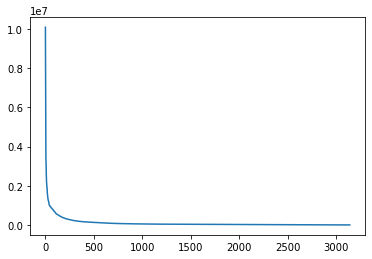

In [66]:
plt.plot(np.arange(len(countiesbypop)), countiesbypop)

Text(0, 0.5, 'Cumulative population')

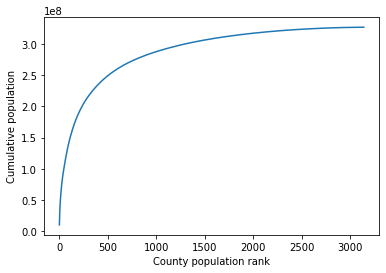

In [70]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.xlabel("County population rank")
plt.ylabel("Cumulative population")

In [68]:
deathsbycountyrev = febdata.deaths.sort_values(ascending=False)

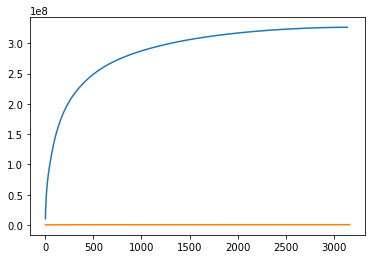

In [69]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.plot(np.arange(len(deathsbycountyrev)), np.cumsum(deathsbycountyrev))

In [ ]:
# -1 point for not being expressive.  326 million and 400k don't
# fit on the same graph.  Log transform?

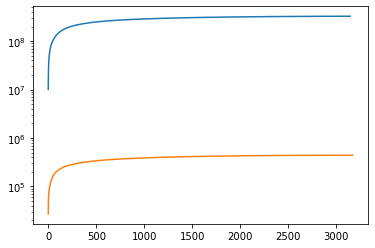

In [71]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.plot(np.arange(len(deathsbycountyrev)), np.cumsum(deathsbycountyrev))
plt.yscale("log")

In [ ]:
# I am being intellecutally dishonest here, watch out. 
# Because I've not joined the two tables on the fips county id yet,
# I am presenting two sorted series of counties 
# that have been sorted by different columns
# as if they are the same.  One is sorted by population;
# one is sorted by deaths.  But each row has its own identity, 
# and there is a one-to-one relationship betwen population and
# deaths that I have NOT yet shown.

In [72]:
population.head(1)

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN


In [73]:
febdata.head(1)

,date,county,state,fips,cases,deaths
982097,2021-01-31 00:00:00,Autauga,Alabama,1001.0,5669,69.0


In [ ]:
# I have to note that the deaths data encodes fips as a 
# floating point number, while the population data enocdes 
# it as an integer.  This is probably enough to prevent me
# from joining it.  


In [74]:
febdata.fips.dtype

dtype('float64')

In [75]:
febdata.fips.astype("int64")

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# There are some bad values in there.

In [76]:
fips= febdata.fips.astype("int64", errors="ignore")

In [77]:
fips.dtype

dtype('float64')

In [78]:
# and this doesn't change the type?
fips= febdata.fips.astype(np.int64, errors="ignore")
fips.dtype

dtype('float64')

In [79]:
# Neither does this, apparently.  How many bad values are there?

In [80]:
np.isinf(fips).sum()

0

In [81]:
np.isnan(fips).sum()

29

In [83]:
# Let's look at them:
counties.loc[np.isnan(counties.fips)]

,date,county,state,fips,cases,deaths
416,2020-03-01 00:00:00,New York City,New York,NaN,1,0.0
418,2020-03-01 00:00:00,Unknown,Rhode Island,NaN,2,0.0
448,2020-03-02 00:00:00,New York City,New York,NaN,1,0.0
450,2020-03-02 00:00:00,Unknown,Rhode Island,NaN,2,0.0
482,2020-03-03 00:00:00,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...
1874252,2021-11-01 00:00:00,Unknown,Puerto Rico,NaN,5390,3234.0
1874264,2021-11-01 00:00:00,Unknown,Rhode Island,NaN,13311,14.0
1874465,2021-11-01 00:00:00,Unknown,Tennessee,NaN,7884,120.0
1874752,2021-11-01 00:00:00,Unknown,Utah,NaN,2478,47.0


In [ ]:
# Ugh oh.  These are deaths I probably want to count, despite
# the fact that I won't be able to join them with population.  
# Only 29 bad fips fields in febdata:

In [84]:
febdata.loc[np.isnan(febdata.fips)]

,date,county,state,fips,cases,deaths
982187,2021-01-31 00:00:00,Unknown,Alaska,NaN,236,0.0
982277,2021-01-31 00:00:00,Unknown,Arkansas,NaN,2907,0.0
982412,2021-01-31 00:00:00,Unknown,Connecticut,NaN,822,7.0
982417,2021-01-31 00:00:00,Unknown,Delaware,NaN,182,0.0
982482,2021-01-31 00:00:00,Unknown,Florida,NaN,3334,0.0
982631,2021-01-31 00:00:00,Unknown,Georgia,NaN,4222,10.0
982647,2021-01-31 00:00:00,Unknown,Guam,NaN,8556,130.0
982788,2021-01-31 00:00:00,Unknown,Illinois,NaN,0,106.0
982980,2021-01-31 00:00:00,Unknown,Iowa,NaN,1065,0.0
983090,2021-01-31 00:00:00,Unknown,Kansas,NaN,0,725.0


In [85]:
febdata.loc[np.isnan(febdata.fips)].deaths.sum()

30878.0

In [ ]:
# Amounting to 31,000 deaths.

In [ ]:
27138.0+1829.0

In [ ]:
febdata.fips.value_counts()

In [ ]:
# 31,000 deaths, almost all of which are from NYC and Puerto Rico.
# I'm willing to treat them as special cases.

In [86]:
# Some trial-and-error suggests that I must fix NaN's first,
# then change the type to int.
febdata.loc[np.isnan(febdata.fips),"fips"] = 999999
fips = febdata.fips.astype(np.int64)
fips.dtype

dtype('int64')

In [87]:
np.isnan(febdata.fips).sum()

0

In [103]:
febdata["fips"] = febdata.fips.astype(np.int64)

In [88]:
np.isnan(counties.fips).sum()

17137

In [90]:
counties.head(1)

,date,county,state,fips,cases,deaths
0,2020-01-21 00:00:00,Snohomish,Washington,53061.0,1,0.0


In [91]:
# That seemed to work
counties.loc[np.isnan(counties.fips),"fips"] = 999999

In [92]:
np.isnan(febdata.fips).sum()

0

In [93]:
counties["fips"] = counties.fips.astype(np.int64)
counties.fips.dtype

dtype('int64')

In [94]:
febdata.loc[np.isnan(febdata.fips)]

,date,county,state,fips,cases,deaths


In [95]:
population.loc[population.region == "Puerto Rico"]

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
1,72,72999,3386941,Puerto Rico,Unknown,NaN


In [96]:
population.loc[population.subregion == "New York City"]

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
1890,36,36998,8443713,New York,New York City,NaN


In [97]:
febdata[febdata.county == "New York City"]

,date,county,state,fips,cases,deaths
983972,2021-01-31 00:00:00,New York City,New York,999999.0,608862,27138.0


In [104]:
febdata.loc[febdata.county == "New York City","fips"] = 36998

In [105]:
# and I should change this for PR and counties too
febdata.loc[febdata.state == "Puerto Rico","fips"] = 72999
counties.loc[counties.county == "New York City","fips"] = 36998
counties.loc[counties.state == "Puerto Rico","fips"] = 72999


In [106]:
febdata.head(1)

,date,county,state,fips,cases,deaths
982097,2021-01-31 00:00:00,Autauga,Alabama,1001,5669,69.0


In [107]:
febdata.fips.dtype

dtype('int64')

In [108]:
population.head(1)

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN


In [109]:
# duplicate the field with a different name for convenience
population["fips"]= population.us_county_fips

In [139]:
deathswithpop= counties.join(population, "fips")

ValueError: columns overlap but no suffix specified: Index(['fips'], dtype='object')

In [140]:
deathswithpop= counties.join(population, "fips", rsuffix="_pop")

In [141]:
deathswithpop.head(2)

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,fips_pop
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22 00:00:00,Snohomish,Washington,53061,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


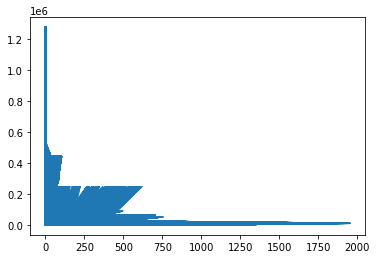

In [113]:
plt.plot(deathswithpop.deaths, deathswithpop.population)

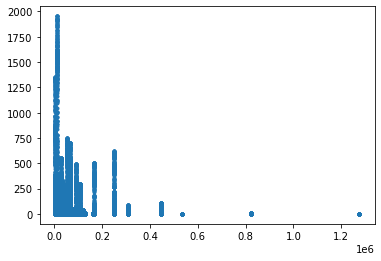

In [114]:
plt.plot(deathswithpop.population, deathswithpop.deaths,'.')

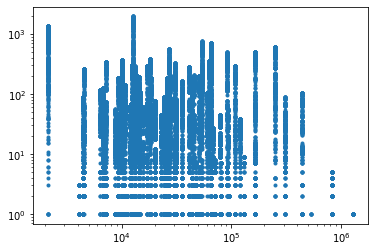

In [115]:
plt.plot(deathswithpop.population, deathswithpop.deaths,'.')
plt.xscale("log"); plt.yscale("log")

In [117]:
# This does not look right. County population should not have
# many values for well-separated points in the middle of the domain.
# Unless I'm plotting all the time points on top of each other.  D'oh.
febdata = deathswithpop.loc[np.where(deathswithpop.date ==np.datetime64("2021-01-31"))]


In [118]:
# Check that numbers add up!
febdata.population.sum()

6707680.0

In [119]:
febdata.deaths.sum()

441299.0

In [ ]:
# While I have all the deaths, I do not have remotely close to all the population.  
# Something is still wrong with my join.

In [120]:
# Look at every thousandth row:
febdata[::1000]

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,fips_pop
982097,2021-01-31 00:00:00,Autauga,Alabama,1001,5669,69.0,21.0,21009.0,43680.0,Kentucky,Barren,NaN,21009.0
983097,2021-01-31 00:00:00,Wyandotte,Kansas,20209,18124,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984097,2021-01-31 00:00:00,Wayne,North Carolina,37191,9281,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985175,2021-01-31 00:00:00,Lewis,Washington,53041,3320,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Let's spot-check Wyandotte County, KS 
population.loc[np.where(population.subregion=="Wyandotte")]

,us_state_fips,us_county_fips,population,region,subregion,nyt_population,fips
996,20,20209,164345,Kansas,Wyandotte,NaN,20209


In [124]:
population

,us_state_fips,us_county_fips,population,region,subregion,nyt_population,fips
0,78,78999,104680,Virgin Islands,Unknown,NaN,78999
1,72,72999,3386941,Puerto Rico,Unknown,NaN,72999
2,66,66999,165768,Guam,Unknown,NaN,66999
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN,69999
4,1,1001,55200,Alabama,Autauga,NaN,1001
...,...,...,...,...,...,...,...
3138,56,56037,44117,Wyoming,Sweetwater,NaN,56037
3139,56,56039,23059,Wyoming,Teton,NaN,56039
3140,56,56041,20609,Wyoming,Uinta,NaN,56041
3141,56,56043,8129,Wyoming,Washakie,NaN,56043


In [128]:
deathswithpop= counties.join(population, "fips", rsuffix="_pop")
deathswithpop[::10000]

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,fips_pop
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,2020-03-24 00:00:00,St. James,Louisiana,22093,9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,2020-03-30 00:00:00,Fayette,Georgia,13113,42,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000,2020-04-03 00:00:00,Union,Ohio,39159,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000,2020-04-07 00:00:00,Darlington,South Carolina,45031,29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830000,2021-10-19 00:00:00,Appling,Georgia,13001,3466,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1840000,2021-10-22 00:00:00,Jo Daviess,Illinois,17085,2166,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850000,2021-10-25 00:00:00,Woodbury,Iowa,19193,19215,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860000,2021-10-28 00:00:00,Jefferson,Louisiana,22051,69492,1162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
deathswithpop.deaths.sum()

223298627.0

In [138]:
deathswithpop.head()

,date,county,state,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population
fips,,,,,,,,,,,
0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
feb = deathswithpop.loc[np.where(deathswithpop.date ==np.datetime64("2021-01-31"))]


In [148]:
len(feb)

3169

In [149]:
feb.population.sum()

6707680.0

In [150]:
len(feb[feb.population>0])

94

In [153]:
# A little bit of a puzzle why only 94 counties out of 3169 joined.
# Search engine...
# https://stackoverflow.com/questions/10114399/pandas-simple-join-not-working
# Use pd.DataFrame.merge; pd.join is index-centric.
deathswithpop= counties.merge(population, on="fips")
feb = deathswithpop.loc[np.where(deathswithpop.date ==np.datetime64("2021-01-31"))]


In [154]:
feb.population.sum()

325437513

In [155]:
feb.deaths.sum()

439361.0

In [156]:
len(feb.loc[feb.population>0])

3135

In [157]:
feb.head()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population
376,2021-01-31 00:00:00,Snohomish,Washington,53061,28373,488.0,53,53061,786620,Washington,Snohomish,NaN
1024,2021-01-31 00:00:00,Cook,Illinois,17031,453634,9374.0,17,17031,5223719,Illinois,Cook,NaN
1671,2021-01-31 00:00:00,Orange,California,6059,245978,3062.0,6,6059,3164182,California,Orange,NaN
2317,2021-01-31 00:00:00,Maricopa,Arizona,4013,472760,7462.0,4,4013,4253913,Arizona,Maricopa,NaN
2963,2021-01-31 00:00:00,Los Angeles,California,6037,1117346,16770.0,6,6037,10098052,California,Los Angeles,NaN


In [ ]:
# I am now satisfied that my table is joined.

In [158]:
feb["percapitadeaths"] = feb.deaths / feb.population

Text(0, 0.5, 'Deaths')

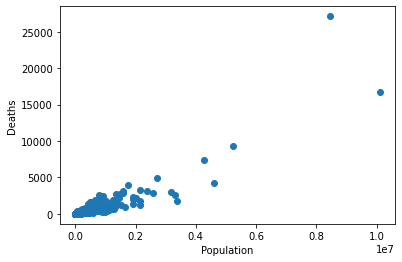

In [161]:
plt.scatter(feb.population, feb.deaths)
plt.xlabel("Population")
plt.ylabel("Deaths")

Text(0, 0.5, 'Deaths')

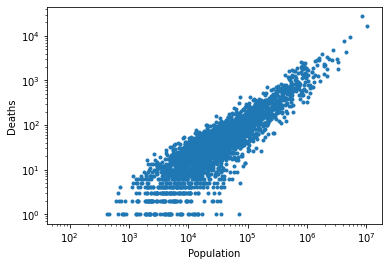

In [163]:
plt.loglog(feb.population, feb.deaths,'.')
plt.xlabel("Population")
plt.ylabel("Deaths")

Text(0.5, 0, 'Per capita death rate')

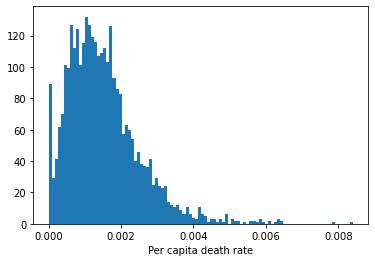

In [165]:
# Just for kicks... histogram of per capita death rate?
plt.hist (feb.percapitadeaths, bins=100)
plt.xlabel("Per capita death rate")

In [166]:
# This looks believable, but this is not the graph on which 
# we will find the truth. 
# WE ARE COUNTING THE WRONG THINGS, as usual.
# Imagine the headline "50% of counties report death rates above
feb.percapitadeaths.median()
# .00134  ( one death per 742 population).  This generalizes how?
# The counties do not all have the same weights.

0.0013469309216855877

In [ ]:
# To get at the Heritige Foundation's implicit question -- how can we show
# the difference between death toll in large and small (population, before-the-fact)
# counties, I suggest plotting cumulative population (small to large) against 
# cumulative deaths.

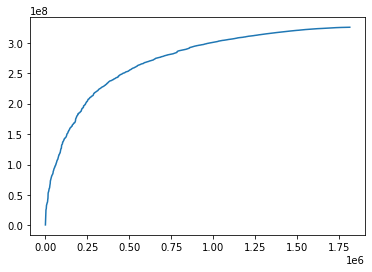

In [167]:
plt.plot(feb.population.cumsum())

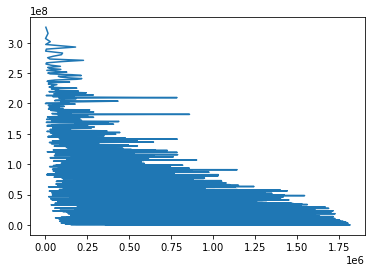

In [175]:
# Och, forgot to sort by population.
plt.plot( feb.population.sort_values(ascending=True).cumsum())

In [171]:
# Uh, what?   
feb.population.sort_values()

1812671          75
1812344         102
1811258         228
1802425         418
1810486         432
             ...   
2317        4253913
29389       4602523
1024        5223719
16009       8443713
2963       10098052
Name: population, Length: 3135, dtype: int64

In [ ]:
# plt.plot behaves differently when the index is a number.  ok. 

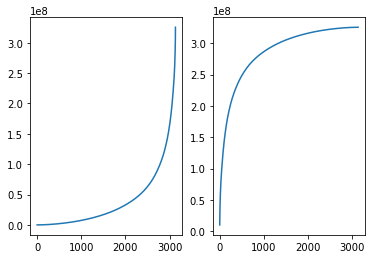

In [177]:
# This gives me cumulative population from smallest to biggest... 
plt.subplot(121);
plt.plot(np.arange(len(feb.population)), feb.population.sort_values(ascending=True).cumsum())
plt.subplot(122)
plt.plot(np.arange(len(feb.population)), feb.population.sort_values(ascending=False).cumsum())

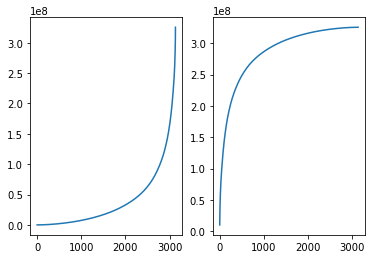

In [179]:
# but I'm using sort_values on feb.population (a series); I need the whole dataframe for 
# the next step. 
plt.subplot(121);
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=True).population.cumsum())
plt.subplot(122)
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=False).population.cumsum())

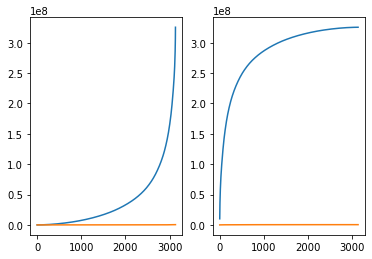

In [180]:
# This gives me the same thing, but also gives me access to deaths in the same order.
# but I'm using sort_values on feb.population (a series); I need the whole dataframe for 
# the next step. 
plt.subplot(121);
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=True).population.cumsum())
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=True).deaths.cumsum())
plt.subplot(122)
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=False).population.cumsum())
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=False).deaths.cumsum())


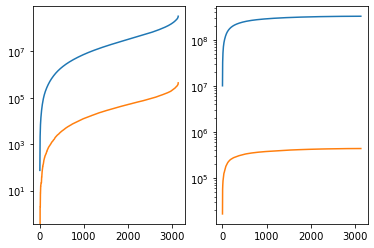

In [181]:
# Make it logarithmic just to make sure we have what we expect
plt.subplot(121);
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=True).population.cumsum())
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=True).deaths.cumsum())
plt.yscale("log")
plt.subplot(122)
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=False).population.cumsum())
plt.plot(np.arange(len(feb.population)), feb.sort_values("population", ascending=False).deaths.cumsum())
plt.yscale("log")

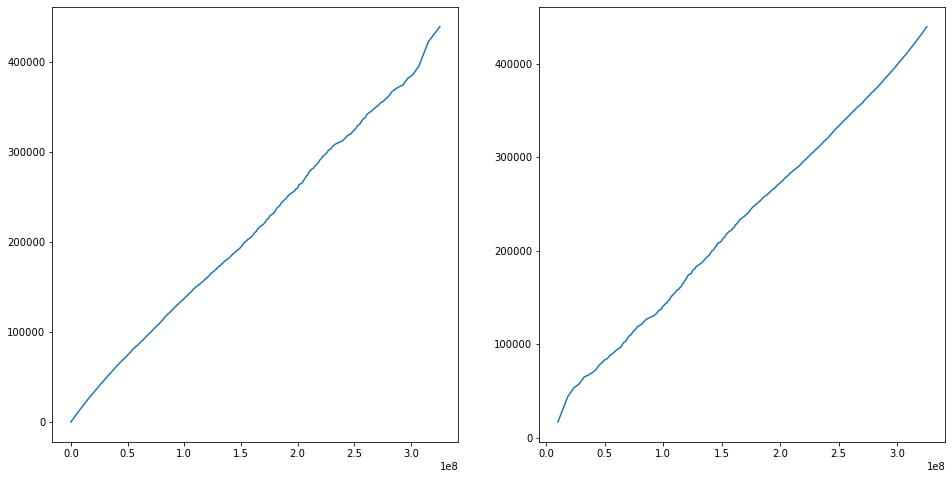

In [183]:
# And now for the finish, plot cumulative population vs. cumulative deaths.
# Before we plot it, we expect it will go from 0,0 to 326M, 411k.
# Make it logarithmic just to make sure we have what we expect
plt.figure(figsize=(16,8))
plt.subplot(121);
plt.plot( feb.sort_values("population", ascending=True).population.cumsum(), feb.sort_values("population", ascending=True).deaths.cumsum())
plt.xlabel("cumulative of population, smallest to largest counties (326M)")
plt.ylabel("cumulative of COVID deaths n = 411k")

plt.subplot(122)
plt.plot( feb.sort_values("population", ascending=False).population.cumsum(), feb.sort_values("population", ascending=False).deaths.cumsum())
plt.xlabel("cumulative of population, largest to smallest counties (326M)")
plt.ylabel("cumulative COVID deaths (Feb 2021) n = 411k")


In [ ]:
# ?!?!?!

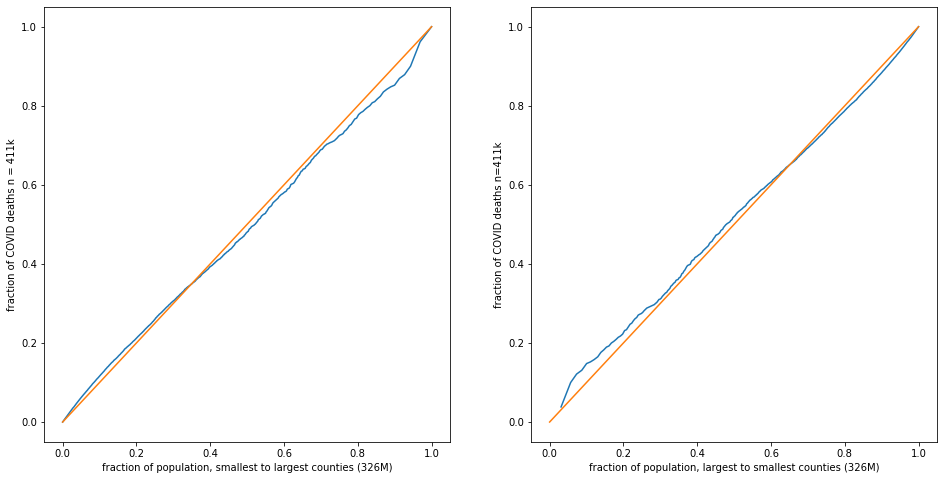

In [189]:
# add line at constant-fraction-population-deaths

plt.figure(figsize=(16,8))
plt.subplot(121);
plt.plot( feb.sort_values("population", ascending=True).population.cumsum() / feb.population.sum(), feb.sort_values("population", ascending=True).deaths.cumsum()/feb.deaths.sum())
plt.xlabel("fraction of population, smallest to largest counties (326M)")
plt.ylabel("fraction of COVID deaths n = 411k")

plt.plot([0,1],[0,1])
plt.subplot(122)
plt.plot( feb.sort_values("population", ascending=False).population.cumsum() / feb.population.sum(), feb.sort_values("population", ascending=False).deaths.cumsum()/feb.deaths.sum())
plt.xlabel("fraction of population, largest to smallest counties (326M)")
plt.ylabel("fraction of COVID deaths n=411k")

plt.plot([0,1],[0,1])

In [ ]:
# This is an honest visualization, but 
# I was not expecting to see this.  
# The effect is real, but seems smaller than we were led to believe.  (Hard to judge from graph)
# On the right-hand graph, we see that large counties are in fact harder hit, 
# and that the third of the population in the smallest counties had lower-than-overall
# death rates.   
# Hmm.  How to make this deceptive?  

# A:  Sort by after-the-fact death rate by county (something you should probably never do)


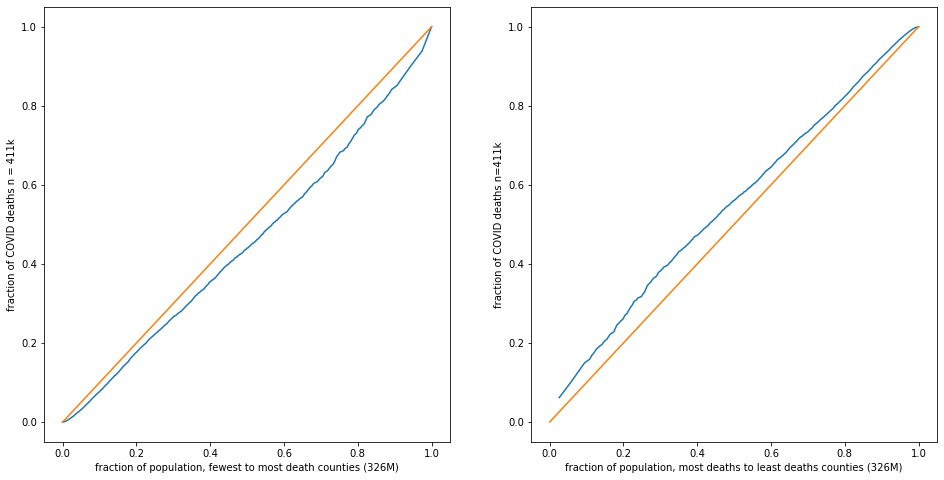

In [190]:
plt.figure(figsize=(16,8))
plt.subplot(121);
plt.plot( feb.sort_values("deaths", ascending=True).population.cumsum() / feb.population.sum(), feb.sort_values("deaths", ascending=True).deaths.cumsum()/feb.deaths.sum())
plt.xlabel("fraction of population, fewest to most death counties (326M)")
plt.ylabel("fraction of COVID deaths n = 411k")

plt.plot([0,1],[0,1])
plt.subplot(122)
plt.plot( feb.sort_values("deaths", ascending=False).population.cumsum() / feb.population.sum(), feb.sort_values("deaths", ascending=False).deaths.cumsum()/feb.deaths.sum())
plt.xlabel("fraction of population, most deaths to least deaths counties (326M)")
plt.ylabel("fraction of COVID deaths n=411k")

plt.plot([0,1],[0,1])

In [203]:
# This is not as dramatic as I was expecting. 
# Let's see if it matches.
#  65 counties most deaths - 31.9% US population 40.3% of deaths

heritage = pd.DataFrame( {
"fracdeaths": feb.sort_values("deaths", ascending=False).deaths.cumsum() / feb.deaths.sum(),
"fracpopulation": feb.sort_values("deaths", ascending=False).population.cumsum() / feb.population.sum()
})

In [204]:
heritage.index = np.arange(len(heritage))

In [205]:
heritage

,fracdeaths,fracpopulation
0,0.061767,0.025946
1,0.099936,0.056975
2,0.121272,0.073026
3,0.138255,0.086098
4,0.149349,0.094442
...,...,...
3130,1.000000,0.999952
3131,1.000000,0.999961
3132,1.000000,0.999987
3133,1.000000,1.000000


In [207]:
heritage.loc[64]

fracdeaths        0.413724
fracpopulation    0.335987
Name: 64, dtype: float64

In [208]:
heritage.loc[60]

fracdeaths        0.402917
fracpopulation    0.324608
Name: 60, dtype: float64

In [209]:
#  65 counties most deaths - 31.9% US population 40.3% of deaths
# This is a size of error that might be caused by consolidating 
# NYC's five boroughs.. 

# The difference at 40.3% of deaths is 0.5% of US population, 
# which is a difference of a county of 1.6M population.
# This isn't far enough off to make me sound the alarm.  

# The deception was in sorting by the outcome of a random process.

fracdeaths        0.400177
fracpopulation    0.323166
Name: 59, dtype: float64

1.6300000000000001

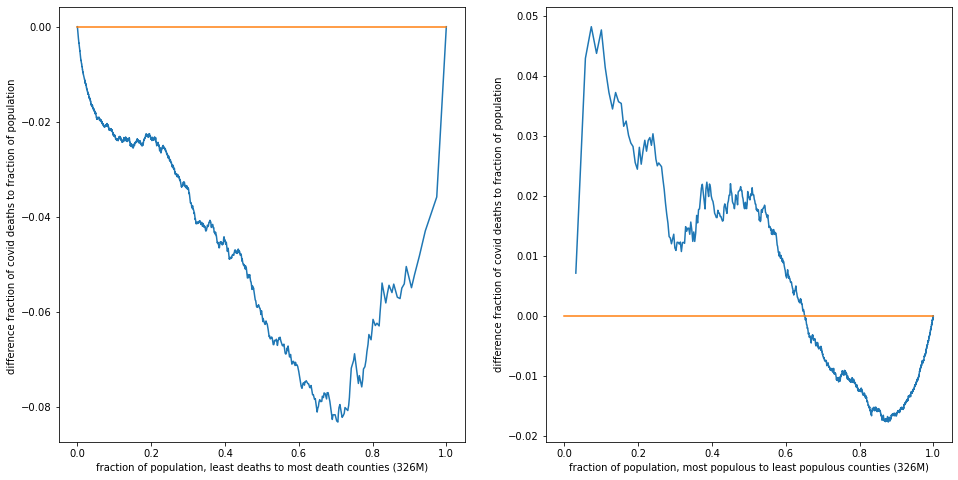

In [217]:
# Maybe I can plot the difference betwen fraction population and fraction of deaths?
plt.figure(figsize=(16,8))
plt.subplot(121);
plt.plot( feb.sort_values("deaths", ascending=True).population.cumsum() / feb.population.sum(),    feb.sort_values("deaths", ascending=True).deaths.cumsum()/feb.deaths.sum()- feb.sort_values("deaths", ascending=True).population.cumsum() / feb.population.sum())
plt.xlabel("fraction of population, least deaths to most death counties (326M)")
plt.ylabel("difference fraction of covid deaths to fraction of population ")

plt.plot([0,1],[0,0])
plt.subplot(122)
plt.plot( feb.sort_values("population", ascending=False).population.cumsum() / feb.population.sum(), feb.sort_values("population", ascending=False).deaths.cumsum()/feb.deaths.sum()- feb.sort_values("population", ascending=False).population.cumsum()/feb.population.sum( ))
plt.xlabel("fraction of population, most populous to least populous counties (326M)")
plt.ylabel("difference fraction of covid deaths to fraction of population")
plt.plot([0,1],[0,0])



In [ ]:
# And this relationship on the left was treated with a slider that
# ran from 0 to 5% of population, and with another slider for the n
# most-death counties that ran from 52% to 89%. 